# CIF

Parsed and computed properties from the `.cif` file using the `Cif` class is discussed.

## Get instant properties - parsed information

The `Cif` class provides a set of accessible properties that can be accessed. Each object is intialized with the `file_path` to the `.cif` file.

In [26]:
from cifkit import Cif, Example
import json

# Utility function for printing dictionary
def prettify_dict(dict_data):
  return json.dumps(dict_data, indent=4)

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Print instantly available properties
print("Formula:", cif.formula)
print("Structure:", cif.structure)
print("Unique elements:", cif.unique_elements)
print("Unitcell lenghts:", cif.unitcell_lengths)
print("Unitcell angles:", cif.unitcell_angles)
print("Site labels:", cif.site_labels)
print("Weight:", cif.weight)
print("Atomic mixing type:", cif.site_mixing_type)
print("Space group number:", cif.space_group_number)
print("Space group number:", cif.space_group_name)
print("Composition type:", cif.composition_type) # 3 -> Ternary
print("Tag:", cif.tag)
print("Atom_site_info:", prettify_dict(cif.atom_site_info))
print("Wyckoff_symbol of Er1:", cif.atom_site_info["Er"]["wyckoff_symbol"])

Formula: ErCoIn5
Structure: HoCoGa5
Unique elements: {'Er', 'Co', 'In'}
Unitcell lenghts: [4.54, 4.54, 7.397]
Unitcell angles: [1.5708, 1.5708, 1.5708]
Site labels: ['In2', 'In1', 'Co', 'Er']
Weight: 800.3
Atomic mixing type: full_occupancy
Space group number: 123
Space group number: P4/mmm
Composition type: 3
Tag: rt
Atom_site_info: {
    "In2": {
        "element": "In",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.0,
        "y_frac_coord": 0.5,
        "z_frac_coord": 0.30474,
        "symmetry_multiplicity": 4,
        "wyckoff_symbol": "i"
    },
    "In1": {
        "element": "In",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.5,
        "y_frac_coord": 0.5,
        "z_frac_coord": 0.0,
        "symmetry_multiplicity": 1,
        "wyckoff_symbol": "c"
    },
    "Co": {
        "element": "Co",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.0,
        "y_frac_coord": 0.0,
        "z_frac_coord": 0.5,
        "symmetry_multiplicity": 1,
        "

## Get instant properties - bond pairs

- The following code returns all possible element and site pairs from the formula in the .cif file.
- The  `mixing_info_per_label_pair` and `mixing_info_per_label_pair_sorted_by_mendeleev` return site mixing information at the pair level.

In [27]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Utility function for printing a set of tuples
def print_tuples(tuples):
  for pair in tuples:
    print(f"({pair[0]}, {pair[1]})")

# All bond pairs
print("\nAll possible bond pairs:")
print_tuples(cif.bond_pairs)

print("\nAll possible bond pairs sorted by Mendeleev:")
print_tuples(cif.bond_pairs_sorted_by_mendeleev)

# All label pairs
print("\nAll possible label pairs from the formula:")
print_tuples(cif.site_label_pairs)

print("\nAll possible label pairs sorted by Mendeleev:")
print_tuples(cif.site_label_pairs_sorted_by_mendeleev)

# Atomic mixing per pair
print("\nAtomic mixing per label pair:")
print((cif.mixing_info_per_label_pair))

print("\nAtomic mixing per label pair sorted by Mendeleev:")
print(cif.mixing_info_per_label_pair_sorted_by_mendeleev)



All possible bond pairs:
(In, In)
(Er, In)
(Er, Er)
(Co, In)
(Co, Co)
(Co, Er)

All possible bond pairs sorted by Mendeleev:
(In, In)
(Er, In)
(Er, Co)
(Er, Er)
(Co, In)
(Co, Co)

All possible label pairs from the formula:
(Er, In1)
(Er, In2)
(Co, In2)
(In2, In2)
(Co, In1)
(In1, In2)
(In1, In1)
(Er, Er)
(Co, Co)
(Co, Er)

All possible label pairs sorted by Mendeleev:
(Er, In1)
(Er, In2)
(Co, In2)
(In2, In2)
(Co, In1)
(In1, In2)
(In1, In1)
(Er, Co)
(Er, Er)
(Co, Co)

Atomic mixing per label pair:
{('Er', 'In1'): 'full_occupancy', ('Er', 'In2'): 'full_occupancy', ('Co', 'In2'): 'full_occupancy', ('In2', 'In2'): 'full_occupancy', ('Co', 'In1'): 'full_occupancy', ('In1', 'In2'): 'full_occupancy', ('In1', 'In1'): 'full_occupancy', ('Er', 'Er'): 'full_occupancy', ('Co', 'Co'): 'full_occupancy', ('Co', 'Er'): 'full_occupancy'}

Atomic mixing per label pair sorted by Mendeleev:
{('Er', 'In1'): 'full_occupancy', ('Er', 'In2'): 'full_occupancy', ('Co', 'In2'): 'full_occupancy', ('In2', 'In2'): 

## Get computed properties - nearest connections per site

Here, I introduce properties that require computing distances between atoms. Unlike instant properties, these properties are derived from the distances computes.

These properties are loaded lazily that accessing any of the properties will exectue `compute_connections()` internally once. The function then will compute `connections` provide all the nearest neighbors from each site.

There are options in `Cif` either using the `by_d_min_method` or `by_best_methods`. Please refer to `README.md.` for the full documentation.

In [28]:
from cifkit import Cif, Example

def print_connected_points(all_labels_connections):
    """
    Utility function for printing connections per site label
    """
    for label, connections in all_labels_connections.items():
        print(f"\nAtom site {label}:")
        for (
            label,
            dist,
            coords_1,
            coords_2,
        ) in connections:
            print(f"{label} {dist} {coords_1}, {coords_2}")


# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Print CN Connections
print("\nFind CN_connections_by_min_dist_method:")
print_connected_points(cif.CN_connections_by_min_dist_method)

print("\nFind CN_connections_by_best_methods:")
print_connected_points(cif.CN_connections_by_best_methods)


Find CN_connections_by_min_dist_method:

Atom site In2:
Co 2.691 [0.0, -2.27, 2.254], [0.0, -4.54, 3.698]
Co 2.691 [0.0, -2.27, 2.254], [-0.0, -0.0, 3.698]
In2 2.889 [0.0, -2.27, 2.254], [-0.0, -2.27, 5.143]
In1 3.199 [0.0, -2.27, 2.254], [2.27, -2.27, 0.0]
Er 3.199 [0.0, -2.27, 2.254], [0.0, -4.54, 0.0]
Er 3.199 [0.0, -2.27, 2.254], [0.0, 0.0, 0.0]
In1 3.199 [0.0, -2.27, 2.254], [-2.27, -2.27, 0.0]
In2 3.21 [0.0, -2.27, 2.254], [-2.27, -4.54, 2.254]
In2 3.21 [0.0, -2.27, 2.254], [2.27, -4.54, 2.254]
In2 3.21 [0.0, -2.27, 2.254], [-2.27, -0.0, 2.254]
In2 3.21 [0.0, -2.27, 2.254], [2.27, -0.0, 2.254]

Atom site In1:
In2 3.199 [2.27, 2.27, 0.0], [2.27, 4.54, -2.254]
In2 3.199 [2.27, 2.27, 0.0], [-0.0, 2.27, 2.254]
In2 3.199 [2.27, 2.27, 0.0], [4.54, 2.27, -2.254]
In2 3.199 [2.27, 2.27, 0.0], [2.27, 4.54, 2.254]
In2 3.199 [2.27, 2.27, 0.0], [2.27, 0.0, -2.254]
In2 3.199 [2.27, 2.27, 0.0], [-0.0, 2.27, -2.254]
In2 3.199 [2.27, 2.27, 0.0], [4.54, 2.27, 2.254]
In2 3.199 [2.27, 2.27, 0.0], [

## Get computed properties - distances

You can get the shortest distance from each site label or the shortest distance for each possible bond pair.

In [29]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

print("Shortest distance:", cif.shortest_distance)
print("Shortest bond pair distances:", cif.shortest_bond_pair_distance)
print("Shortest site pair distances:", cif.shortest_site_pair_distance)

Shortest distance: 2.691
Shortest bond pair distances: {('Co', 'In'): 2.691, ('In', 'In'): 2.889, ('Er', 'In'): 3.199, ('Co', 'Er'): 3.698, ('Co', 'Co'): 4.54, ('Er', 'Er'): 4.54}
Shortest site pair distances: {'In2': ('Co', 2.691), 'In1': ('In2', 3.199), 'Co': ('In2', 2.691), 'Er': ('In2', 3.199)}


## Get computed properties - coordination numbers

Compute `avg`, `min`, `max`, `unique` of coordination numbers determined by one of the best methods or min distance method.

In [30]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Bond counts
print("\nCN_bond_count_by_min_dist_method:")
print(cif.CN_bond_count_by_min_dist_method)

print("\nCN_bond_count_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_count_by_best_methods:")
print(cif.CN_bond_count_by_best_methods)

print("\nCN_bond_count_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_best_methods_sorted_by_mendeleev)

# Bond fractions
print("\nCN_bond_fractions_by_min_dist_method:")
print(cif.CN_bond_fractions_by_min_dist_method)

print("\nCN_bond_fractions_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_fractions_by_best_methods:")
print(cif.CN_bond_fractions_by_best_methods)

print("\nCN_bond_fractions_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_best_methods_sorted_by_mendeleev)

# Unique coordination numbers
print("\nCN_unique_values_by_min_dist_method")
print(cif.CN_unique_values_by_min_dist_method)

print("\nCN_unique_values_by_best_methods")
print(cif.CN_unique_values_by_best_methods)

# Average coordination number
print("\nCN_avg_by_min_dist_method:")
print(cif.CN_avg_by_min_dist_method)

print("\nCN_avg_by_best_methods: ")
print(cif.CN_avg_by_best_methods)

# Min coordination number
print("\nCN_max_by_min_dist_method:")
print(cif.CN_max_by_min_dist_method)

print("\nCN_max_by_best_methods:")
print(cif.CN_max_by_best_methods)

# Max coordination number
print("\nCN_min_by_min_dist_method:")
print(cif.CN_min_by_min_dist_method)

print("\nCN_min_by_best_methods:")
print(cif.CN_min_by_best_methods)


CN_bond_count_by_min_dist_method:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8}, 'Er': {('Er', 'In'): 12, ('Co', 'Er'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_min_dist_method_sorted_by_mendeleev:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8}, 'Er': {('Er', 'In'): 12, ('Er', 'Co'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_best_methods:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8, ('Co', 'Er'): 2, ('Co', 'Co'): 4}, 'Er': {('Er', 'In'): 12, ('Co', 'Er'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_best_methods_sorted_by_mendeleev:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8, ('Er', 'Co'): 2, ('Co', 'Co'): 4}, 'Er': {('Er', 'In'): 12, ('Er', 'Co'): 2, ('Er', 'Er'): 4}}

C

## Draw polyhedrons

You may use `Jupyter` notebook or a python script to execute the following to generate and save a polyhedron generated from each site and the nearest neighbor atoms are determined from the coordination number geometry.


Site labels: ['In2', 'In1', 'Co', 'Er']


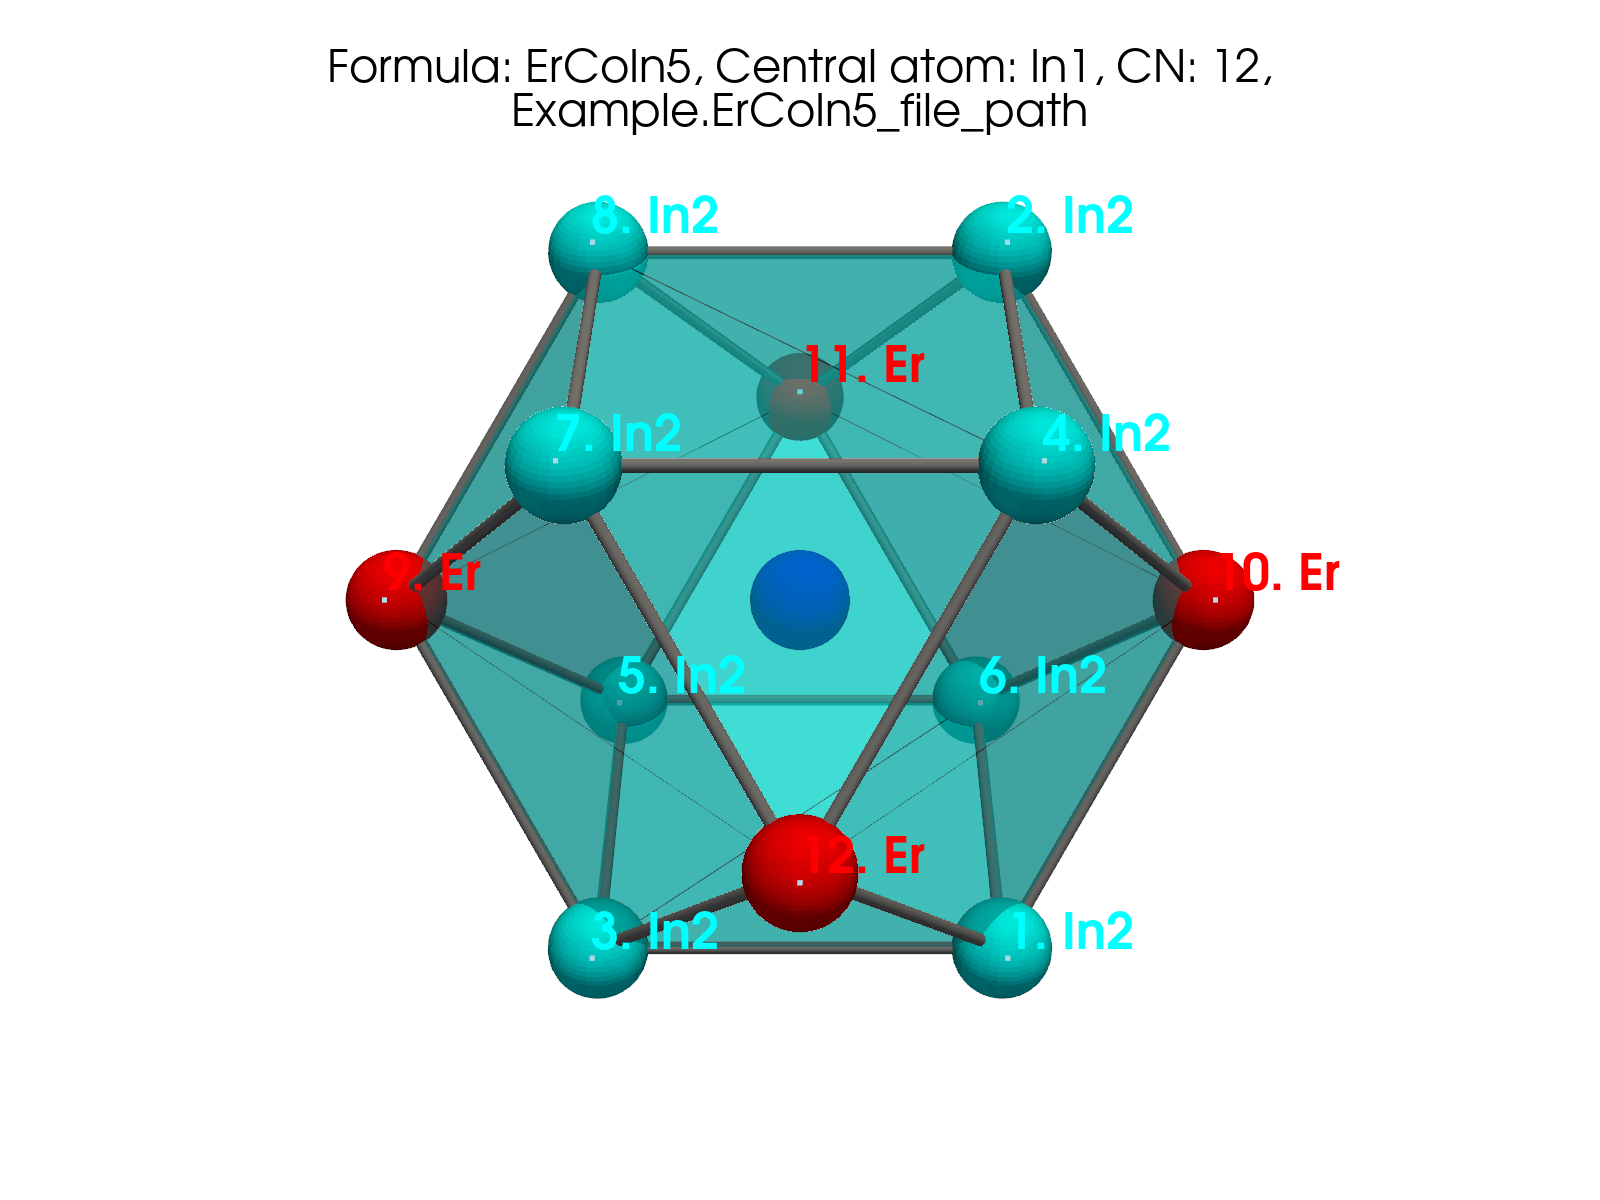

In [31]:
from cifkit import Cif, Example
import warnings
warnings.filterwarnings('ignore') # For Jupyter Notebook only


# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Enter site labels. you can get site labels using cif.labels
print("Site labels:", cif.site_labels)

# Plot
cif.plot_polyhedron("In1", is_displayed=True)